## Spin Cycling of Partition Trees

In [3]:
import tree
import numpy as np
import matplotlib.pyplot as plt

To illustrate this, consider the dyadic tree of $n$ levels on the interval $\left[0,1\right]$. This tree divides the interval into $2^n$ equally sized regions. Suppose we consider the distances between points in [0,1] in the tree metric. Points that lie within the same leaf folder have distance $\frac{1}{2^n}$; points that lie within the same folder at the next higher level have twice that distance, and so on. Now if we consider $D_{tree}\left(0,x\right)$ in this metric, it behaves a natural manner:



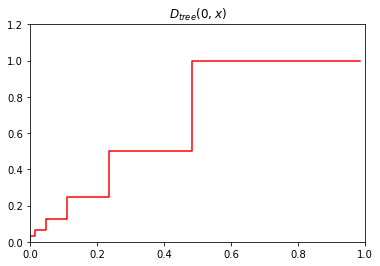

In [4]:
t = tree.dyadic_tree(6)
y = np.array([t.tree_distance(0,x) for x in t.elements])
plt.step(np.arange(0,t.size,1.0)/(1.0*t.size),y,'r')
plt.ylim(0.0,1.2)
plt.xlim(0.0,1.0)
plt.title("$D_{tree}(0,x)$")
plt.show()

However, now consider the point $\frac{1}{2}-\epsilon$. The distance function $D_{tree}\left(\frac{1}{2}-\epsilon,x\right)$ exhibits some strange behavior:

Points to the left of this point have a somewhat normal progression of tree distances. However, points to the right of $\frac{1}{2}$ all have distance 1 from $\frac{1}{2}-\epsilon$. This leads to the fact that $D_{tree}\left(\frac{1}{2}-\epsilon,\frac{1}{2}+\epsilon\right)=1$ even for small $\epsilon$.

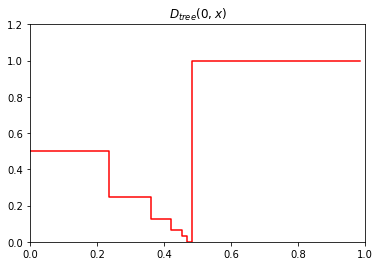

In [5]:
t = tree.dyadic_tree(6)
y = np.array([t.tree_distance(31,x) for x in t.elements])
plt.step(np.arange(0,t.size,1.0)/(1.0*t.size),y,'r')
plt.ylim(0.0,1.2)
plt.xlim(0.0,1.0)
plt.title("$D_{tree}(0,x)$")
plt.show()

This is a significant defect in the tree structure, which arises from what might be termed the basic arbitrariness of dividing points into folders. When the underlying data in the “true” space is neatly separated into a tree-like structure, this problem is minimized because points which are close in the true space will be close in the tree metric under all circumstances. But when the underlying data forms a continuum or the trees are restricted to folders of a particular size, situations where two points which are close in truth are far apart in the tree metric occur often. In some sense, what this means is that we cannot trust our trees, no matter how well they are constructed.

One good solution is to construct many trees, implement some process using them, and then combine the results of the processes to make a final estimate. In the setting of the tree metric as above, we can see that the average distance over 256 trees appears relatively smooth and natural. The removal of the artifacts arising from the use of discrete trees in our process is an important part of the reconstruction process that follows. Note that we can also achieve "better" smoothness by creating random trees.

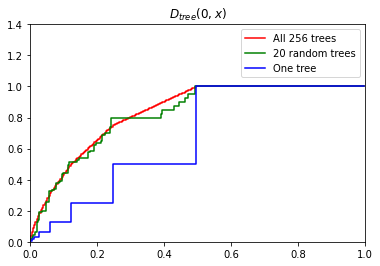

In [6]:
n= 8
t = tree.dyadic_tree(n)
distances = np.zeros(2**n)
for i in range(2**n):
    y = np.array([1.0 if i > x else t.tree_distance(i,x) 
                  for x in t.elements])
    distances += y.take(np.arange(i,2**n+i,1),
                        mode='wrap')/(2.0**n)
plt.step(np.arange(0,t.size,1.0)/(1.0*t.size),
         distances,'r',label="All {} trees".format(2**n))

iters=20
distances = np.zeros(2**n)
for i in np.random.randint(0,2**n-1,iters):
    y = np.array([1.0 if i > x else t.tree_distance(i,x) 
                  for x in t.elements])
    distances += y.take(np.arange(i,2**n+i,1),
                        mode='wrap')/(iters)
plt.step(np.arange(0,t.size,1.0)/(1.0*t.size),
         distances,'g',label="{} random trees".format(iters))

y = np.array([t.tree_distance(0,x) for x in t.elements])
plt.step(np.arange(0,t.size,1.0)/(1.0*t.size),y,'b',
         label="One tree")

plt.title("$D_{}(0,x)$".format("{tree}",iters))
plt.ylim(0.0,1.4)
plt.xlim(0.0,1.0)
plt.legend()
plt.show()